<a href="https://colab.research.google.com/github/ArashBarmas/ACM-AI/blob/master/Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Prices

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Street_scape_in_Boston-Edison.jpg" width=400/>

Today we are going to building a **linear regression** model to predict house prices in Boston.

#### Review: Unsupervised vs Supervised Learning
*   Supervised learning uses existing inputs and outputs to create a mapping function from inputs to outputs
  * Can be used for regression problems, where outputs are continuous, or classification problems, where output is discrete
*   Unsupervised learning finds relationships and clusters in input data

We use the hypothesis function

$$h(x^{i}) = w^{T}x^{i} + b$$

to make an output prediction for each training example, representing the expected price of a house. We use the following loss function to calculate how accurate our prediction is:

$$Loss = L(y^{i} , a^{i}) = \frac{1}{2}(a^{i} - y^{i})^{2}$$

Then, we apply gradient descent to optimize our weights.

#### Some of the things you will learn
* General architecture of a learning algorithm
* initializing parameters
* doing forward propagation
* calculating the cost function
* doing back propagation with gradient descent

#### Instructions
1. You will write your code between 
```python 
### START CODE HERE ###
```
```python 
### END CODE HERE ###
```

2. Do not use any loops (the necessary loop is included for you!)

## Packages
First let's import some libraries
* [scikit-learn](http://scikit-learn.org/stable/) is used to get our dataset
* [numpy](http://www.numpy.org/) is used for scientific computing
* [matplotlib](https://matplotlib.org/) is used for plotting data
* [pandas](https://pandas.pydata.org/) is used for data processing and analysis
* [seaborn](https://seaborn.pydata.org/) is used for statistical data visualization

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Data Visualization

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos = bos.drop('B', axis = 1)
bos['PRICE'] = boston.target
pd.options.display.width = 300
print(bos.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   5.33   36.2


         CRIM      per capita crime rate by town
         ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
         INDUS     proportion of non-retail business acres per town
         CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
         NOX       nitric oxides concentration (parts per 10 million)
         RM        average number of rooms per dwelling
         AGE       proportion of owner-occupied units built prior to 1940
         DIS       weighted distances to five Boston employment centres
         RAD       index of accessibility to radial highways
         TAX       full-value property-tax rate per $10,000
     PTRATIO   pupil-teacher ratio by town
     LSTAT     % lower status of the population
     MEDV      Median value of owner-occupied homes in $1000's

##

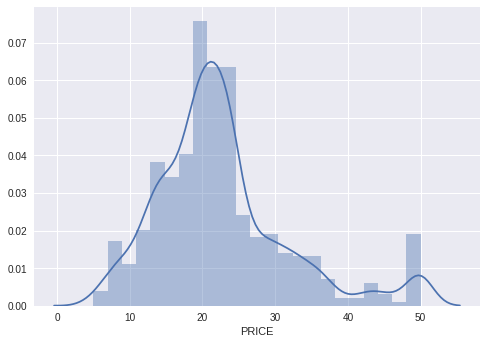

In [3]:
# See the general trend in the prices

sns.distplot(bos['PRICE'])

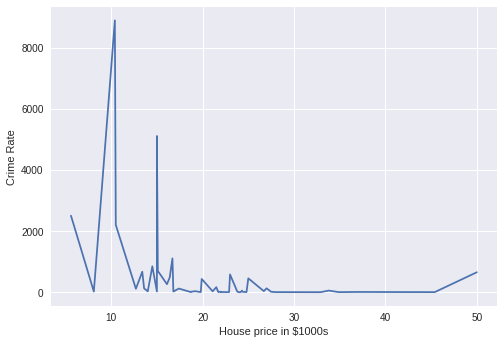

In [4]:
# Plotting simple relations
# Relation between Crime rate and Price:

plt.plot(bos.iloc[::10, :]['PRICE'].sort_values(), bos.iloc[::10, :].sort_values('PRICE')['CRIM']*100)
plt.xlabel('House price in $1000s')
plt.ylabel('Crime Rate')
plt.show()


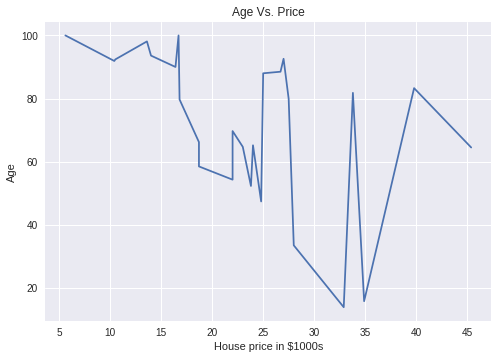

In [5]:

# Relation between Age of the house and Price
plt.plot(bos.iloc[::20, :]['PRICE'].sort_values(), bos.iloc[::20, :].sort_values('PRICE')['AGE'])
plt.xlabel('House price in $1000s')
plt.ylabel('Age')
plt.title('Age Vs. Price')
plt.show()

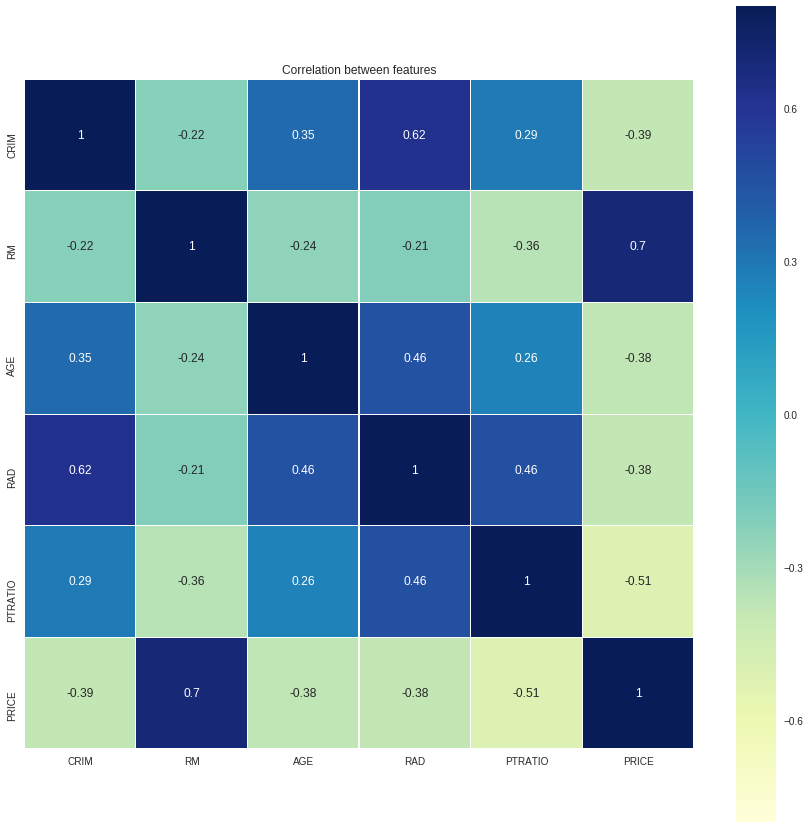

In [6]:
# Pairwise Correlation between the features


current_palette = sns.color_palette()
corr=bos.iloc[:,[0,5,6,8,10,12]].corr()

plt.figure(figsize=(15, 15))

sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [7]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM         AGE         DIS         RAD         TAX     PTRATIO       LSTAT       PRICE
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   22.532806
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   28.148861    2.105710    8.707259  168.537116    2.164946    7.141062    9.197104
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000    2.900000    1.129600    1.000000  187.000000   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   17.025000
50%      0.256510    0.00000

In [8]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

X_train = np.asarray(X_train).T
X_test = np.asarray(X_test).T
Y_train = np.asarray(Y_train).reshape(1, Y_train.shape[0])
Y_test = np.asarray(Y_test).reshape(1, Y_test.shape[0])

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12, 339)
(12, 167)
(1, 339)
(1, 167)


## **Architecture of the Learning Algorithm**

Now it's time to get started on the learning algorithm itself! You will build a linear regression algorithm.


**Mathematical algorithm:**

Given $x^{i}$ which is 1 training example of size (12 , 1), 

$$h(x^{i})=z^{i} = w^{T}x^{i} + b$$

$$Loss = L(y^{i}, a^{i})=(a^{i} - y^{i})^{2}$$

Then to calculate the cost over all m training samples,

$$Cost = J = \frac{1}{2m}\sum _{i = 1}^{m} L(y^{i}, a^{i})$$


The superscript $^{T}$ just means transpose. What this algorithm is doing is calculating the model predictions for each training sample, and then finding the average loss over all the samples where loss is a measure of how far off the predictions are from the correct labels.

**Next steps are:**


1.   Define model structure
2.   Initialize parameters
3.   Implement gradient descent: calculate loss, gradient, and update parameters.




### Initializing Parameters

We need a function that inputs a matrix size, and then creates a weight matrix and a bias that are initialized to zero.

Hint: `np.zeros(shape=(x,y))` returns a numpy array of zeros of shape (x,y)

In [0]:
def initialize_with_zeros(dim):
    
    w = np.zeros(shape = (dim,1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [11]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


### Forward Propagation

Now it's time to implement forward propagation. During forward propagation we will compute the model predictions, the cost over all of our samples and the gradients for the weights and bias. Here are the steps we will need to take:

1. use the equation $w^{T}X + b$ to compute $A$  *(the capital $X$ means that it is a matrix containing all of our $x^{i}$ samples)*
3. use the cost function described earlier to compute our cost $J$
4. compute the gradients using the equations given below

As a reminder our cost function is $J = \frac{1}{2m}\sum _{i = 1}^{m} (a^{i} - y^{i})^{2}$

**Gradients:**


$$db = \frac{\partial J}{\partial b} = \frac{1}{m}\sum _{i = 1}^{m} a^{i} - y^{i}$$
$$$$
$$dw = \frac{\partial J}{\partial w} = \frac{1}{m}\sum _{i = 1}^{m} (a^{i} - y^{i})x^{i}$$

If you have taken multivariable calculus then these equations are the partial derivatives of our cost function $J$ with respect to our weights $w$ and our bias $b$. By taking their negatives we can optimize our cost function in the direction of steepest descent. If the last two scentences made no sense then fear not. You can simply implement these equations without fully understanding them. Just know that using these equations we can reduce our cost and move closer to a loss of 0 (i.e. a correct prediction).
$$$$

Hint: 
* you can use `np.dot()` to multiply two matrices together
* you can use `np.sum()` to take the sum of all the elements in a matrix

In [0]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (12, 1)
    b -- bias, a scalar
    X -- data of size (12, number of examples)
    Y -- house prices (in 1000s)

    Return:
    cost -- mean squared error
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = np.dot(w.T,X)+b # compute activation
    cost = (1/2*m)*(np.sum((A-Y)**2))   # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [19]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[16.]
 [36.]]
db = 10.0
cost = 208.0


Expected Output:

* dw = [[16.] [ 36.]]
* db = 10.0
* cost = 52.0

### Backpropagation

Now we want to use the gradients that we computed earlier to perform back propagation. Back propagation is process we use to update our weights bias by a small amount so that our model gets a little better better at making predictions. Here are the equations in case you forgot:

$$w = w - \alpha * dw$$
$$b = b - \alpha * db$$

$\alpha$ is our learning rate, which is often a small number like .01, .001, or .000001. If you remember from the slides, we want to update our weights and bias without overshooting the minimum for our cost function. The picture below illustrates this.

<img src="https://storage.googleapis.com/aibootcamp/Week%201/assets/divergence.jpg" width="350" height="240"/>

In [0]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1 line of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w,b,X,Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        
        # Record the costs
        if i != 0 and i % 1000 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i != 0 and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [21]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[-0.08140605]
 [-0.24334521]]
b = 1.419030420562572
dw = [[ 0.08670598]
 [-0.02296021]]
db = -0.05483309171519252


Expected Output:
* **w = ** [[-0.08140605] [-0.24334521]]
* **b = ** 1.419030420562572
* **dw = ** [[ 0.08670598] [-0.02296021]]
* **db = ** -0.05483309171519252

### Predictions

Once we have trained our model, we need a way to use it. For that we will create a function called predict that will take an input of training samples, a weight matrix and a bias, and then output predictions price of the house.

$$A = w^{T}X + b$$

In [0]:
def predict(w, b, X):
    
    m = X.shape[1]
    prediction = np.dot(w.T,X) + b
    
    
    
    
    assert(prediction.shape == (1, m))
    
    return prediction

In [27]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[ 9 12]]


Expected output:
* [[9 12]]

### Model

Now that we all the pieces of linear regression, lets put all together into one function. 

Implement the model function. Use the following notation:

* `prediction_test` for your predictions on the test set
* `prediction_train` for your predictions on the train set
* `w`, `costs`, `grads` for the outputs of optimize()

In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.01, print_cost=False):
    """
    Builds the linear regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (12, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (12, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters['b']
    
    # Predict test/train set examples (≈ 2 lines of code)
    prediction_test = predict(w,b,X_test)
    prediction_train = predict(w,b,X_train)

    
    ### END CODE HERE ###

    #convert error to RMSE
    train_rmse = np.sqrt( 1 / X_train.shape[1] * np.sum(( prediction_train - Y_train ) ** 2) )
    test_rmse = np.sqrt( 1 / X_test.shape[1] * np.sum(( prediction_test - Y_test ) ** 2) )
    
    # Print train/test Errors
    print("\ntrain RMSE: {}".format(train_rmse))
    print("test RMSE: {}".format(test_rmse))

    
    d = {"costs": costs,
         "Y_prediction_test": prediction_test, 
         "Y_prediction_train" : prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [29]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 50000, learning_rate = 0.00001, print_cost = True)


train RMSE: 6.0800950740323705
test RMSE: 6.491753239651829


Expected Output:
* train RMSE: 6.0800950740323705
* test RMSE: 6.491753239651829

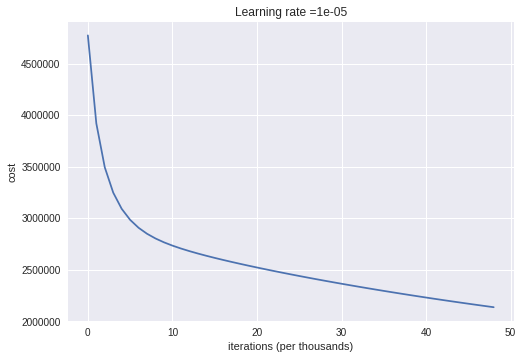

In [30]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per thousands)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()